In [1]:
# Crossplot generation using lithologic algorithms [Python Porgramming Language] for Jaba Field, well 3. 
# Modified: 23/10/2021
# Created by: Fisayo Fagbemi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [2]:
las = lasio.read("Well_D.las")

In [3]:
#pip install lasio

In [4]:
df = las.df()
df.describe()

,DT:1,CAL,RHOB,GR:1,GR:2,LLD:1,LLD:2,DT:2
count,3781.000000,4957.000000,6121.000000,3799.000000,3801.000000,7522.000000,4968.000000,3781.000000
mean,110.624545,9.281349,2.224443,8.620350,55.495084,64.553507,5.876888,110.624545
std,9.031034,0.357638,0.095656,1.873827,24.677570,131.279211,2.309283,9.031034
min,67.142000,7.412000,1.750000,4.322600,0.620900,1.394000,0.853000,67.142000
25%,105.101000,9.096000,2.176000,7.216650,36.509400,12.654500,4.440750,105.101000
50%,109.350000,9.244000,2.223000,8.769700,50.622300,28.576500,6.836000,109.350000
75%,116.149000,9.397000,2.267000,9.792850,72.193900,76.572750,7.372000,116.149000
max,208.498000,12.076000,2.737000,15.072100,104.034300,1467.429900,19.686000,208.498000


In [5]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [6]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH STE")]

In [7]:
las.sections['Well']

[HeaderItem(mnemonic="STRT", unit="ft", value="3980.5", descr="START DEPTH"),
 HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr="STEP DEPTH"),
 HeaderItem(mnemonic="STOP", unit="ft", value="10133.0337", descr="STOP DEPTH"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="WELL", unit="", value="Well_C", descr="WELL"),
 HeaderItem(mnemonic="XWELL", unit="m", value="521944", descr="X POS"),
 HeaderItem(mnemonic="YWELL", unit="m", value="108265", descr="Y POS"),
 HeaderItem(mnemonic="EDF", unit="", value="75.65", descr="DERICK FLOOR ELEVATI")]

In [8]:
las.sections['Curves']

[CurveItem(mnemonic="DEPT", unit="ft", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(12306,)),
 CurveItem(mnemonic="LLD", unit="ohm.m", value="", descr="6", original_mnemonic="LLD", data.shape=(12306,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="5", original_mnemonic="GR", data.shape=(12306,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="4", original_mnemonic="RHOB", data.shape=(12306,)),
 CurveItem(mnemonic="CAL", unit="in", value="", descr="3", original_mnemonic="CAL", data.shape=(12306,)),
 CurveItem(mnemonic="DT", unit="us/ft", value="", descr="1", original_mnemonic="DT", data.shape=(12306,))]

In [9]:
las.sections['Parameter']

[]

In [10]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: ft, Description: DEPTH
Curve: LLD, Units: ohm.m, Description: 6
Curve: GR, Units: API, Description: 5
Curve: RHOB, Units: g/cm3, Description: 4
Curve: CAL, Units: in, Description: 3
Curve: DT, Units: us/ft, Description: 1
There are a total of: 6 curves present within this file


In [11]:
for item in las.curves:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

DEPTH (DEPT): 
6 (LLD): 
5 (GR): 
4 (RHOB): 
3 (CAL): 
1 (DT): 


In [12]:
las.sections['Other']

''

In [13]:
df.head(240)

,LLD,GR,RHOB,CAL,DT
DEPT,,,,,
3980.5,NaN,37.5099,NaN,NaN,NaN
3981.0,NaN,38.0115,NaN,NaN,NaN
3981.5,NaN,38.2635,NaN,NaN,NaN
3982.0,NaN,38.5215,NaN,NaN,NaN
3982.5,NaN,38.9587,NaN,NaN,NaN
...,...,...,...,...,...
4098.0,18.8328,20.5249,NaN,11.5280,150.0000
4098.5,21.1550,20.2449,NaN,11.5214,150.0000
4099.0,23.4773,20.6821,NaN,11.5205,150.0000


In [14]:
well = las.df()

In [15]:
well.head()

,LLD,GR,RHOB,CAL,DT
DEPT,,,,,
3980.5,NaN,37.5099,NaN,NaN,NaN
3981.0,NaN,38.0115,NaN,NaN,NaN
3981.5,NaN,38.2635,NaN,NaN,NaN
3982.0,NaN,38.5215,NaN,NaN,NaN
3982.5,NaN,38.9587,NaN,NaN,NaN


In [16]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12306 entries, 3980.5 to 10133.0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LLD     11781 non-null  float64
 1   GR      11820 non-null  float64
 2   RHOB    8581 non-null   float64
 3   CAL     12261 non-null  float64
 4   DT      11781 non-null  float64
dtypes: float64(5)
memory usage: 576.8 KB


<AxesSubplot:xlabel='DEPT'>

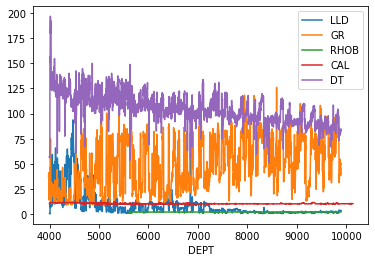

In [17]:
well.plot()

<AxesSubplot:xlabel='DEPT'>

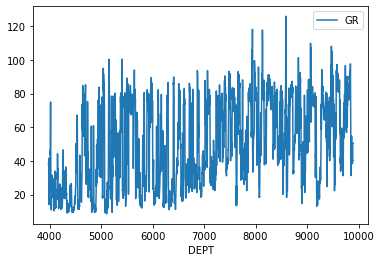

In [18]:
well.plot(y='GR')

<AxesSubplot:xlabel='DEPT'>

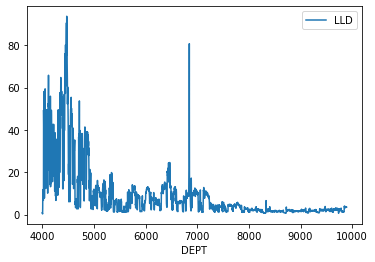

In [19]:
well.plot(y='LLD')

<AxesSubplot:xlabel='DEPT'>

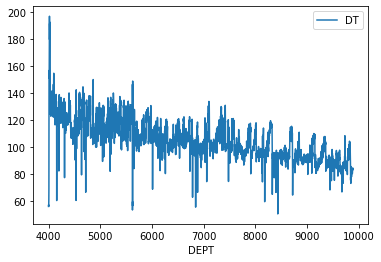

In [20]:
well.plot(y='DT')

<AxesSubplot:xlabel='DEPT'>

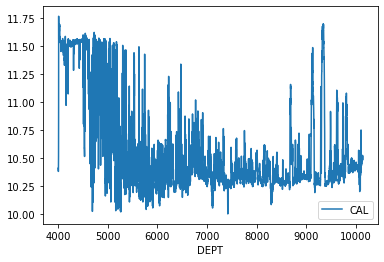

In [22]:
well.plot(y='CAL')

<AxesSubplot:xlabel='DEPT'>

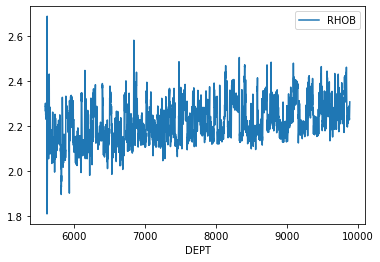

In [23]:
well.plot(y='RHOB')

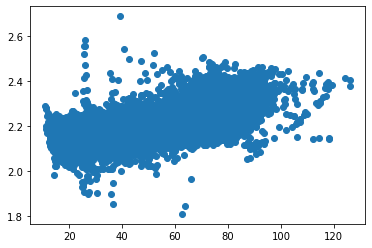

In [24]:
plt.scatter(x = 'GR', y = 'RHOB', data = df)
plt.show()

In [25]:
plt.rcParams['figure.figsize'] = (8, 8)

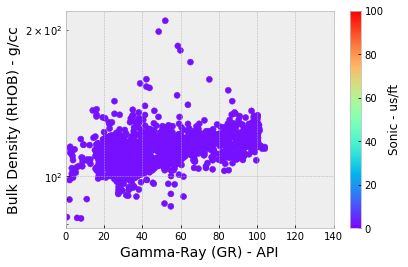

In [7]:
plt.style.use('bmh')

plt.scatter(x = 'GR:2', y = 'DT:2', data = df, c ='RHOB', vmin = 0, vmax = 100, cmap = 'rainbow')

plt.xlim(0, 140)

#plt.ylim(16, 28)

plt.yscale('log')
plt.semilogy();

plt.ylabel('Bulk Density (RHOB) - g/cc', fontsize=14)

plt.xlabel('Gamma-Ray (GR) - API', fontsize=14)

plt.colorbar(label='Sonic - us/ft')

plt.show()

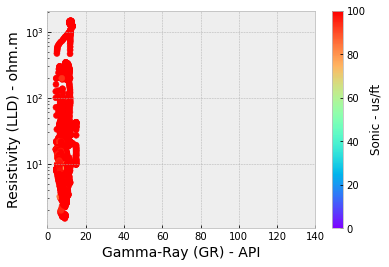

In [8]:
plt.style.use('bmh')

plt.scatter(x = 'GR:1', y = 'LLD:1', data = df, c ='DT:1', vmin = 0, vmax = 100, cmap = 'rainbow')

plt.xlim(0, 140)

#plt.ylim(16, 28)

plt.yscale('log')
#plt.semilogy();

plt.ylabel('Resistivity (LLD) - ohm.m', fontsize=14)

plt.xlabel('Gamma-Ray (GR) - API', fontsize=14)

plt.colorbar(label='Sonic - us/ft')

plt.show()

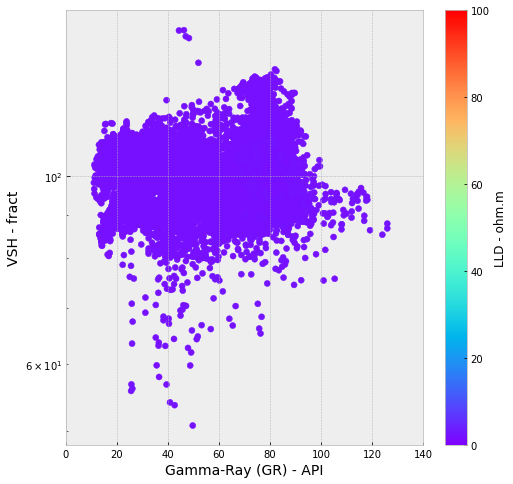

In [33]:
plt.style.use('bmh')

plt.scatter(x = 'GR', y = 'DT', data = df, c ='RHOB', vmin = 0, vmax = 100, cmap = 'rainbow')

plt.xlim(0, 140)

#plt.ylim(16, 28)

plt.yscale('log')
plt.semilogy();

plt.ylabel('VSH - fract', fontsize=14)

plt.xlabel('Gamma-Ray (GR) - API', fontsize=14)

plt.colorbar(label='LLD - ohm.m')

plt.show()

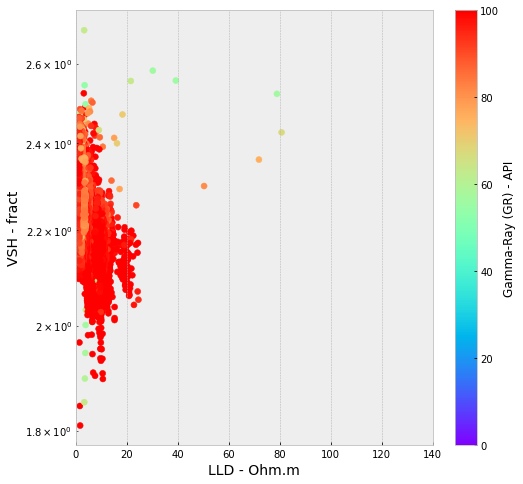

In [35]:
plt.style.use('bmh')

plt.scatter(x = 'LLD', y = 'RHOB', data = df, c ='DT', vmin = 0, vmax = 100, cmap = 'rainbow')

plt.xlim(0, 140)

#plt.ylim(16, 28)

plt.yscale('log')
plt.semilogy();

plt.ylabel('VSH - fract', fontsize=14)

plt.xlabel('LLD - Ohm.m', fontsize=14)

plt.colorbar(label='Gamma-Ray (GR) - API')


plt.show()

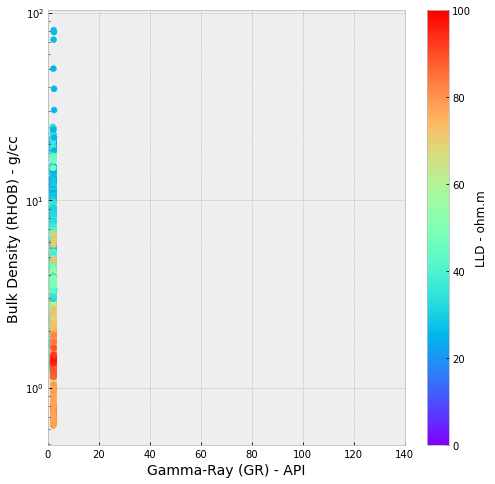

In [42]:
plt.style.use('bmh')

plt.scatter(x = 'RHOB', y = 'LLD', data = df, c ='GR', vmin = 0, vmax = 100, cmap = 'rainbow')

plt.xlim(0, 140)

#plt.ylim(16, 28)

plt.yscale('log')
plt.semilogy();

plt.ylabel('Bulk Density (RHOB) - g/cc', fontsize=14)

plt.xlabel('Gamma-Ray (GR) - API', fontsize=14)

plt.colorbar(label='LLD - ohm.m')

plt.show()

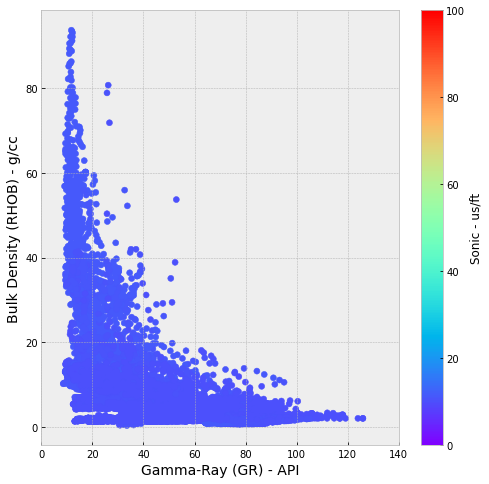

In [41]:
plt.style.use('bmh')

plt.scatter(x = 'GR', y = 'LLD', data = df, c ='CAL', vmin = 0, vmax = 100, cmap = 'rainbow')

plt.xlim(0, 140)

#plt.ylim(16, 28)

#plt.yscale('log')
#plt.semilogy();

plt.ylabel('Bulk Density (RHOB) - g/cc', fontsize=14)

plt.xlabel('Gamma-Ray (GR) - API', fontsize=14)

plt.colorbar(label='Sonic - us/ft')

plt.show()